In [1]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
import interpret.glassbox
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [2]:
y = (data['i.coronari'])
data = data.drop(['i.death', 'id', 'i.coronari', 'i.ami', 'i.angor'], axis = 1)

In [3]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)
##########
X100 = data2[feature_names]

In [4]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [5]:
# X_display,y_display = shap.datasets.adult(display=True)
X_display = X
y_display = y

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)



pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [12]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=100)


[0]	test-logloss:0.19851
[100]	test-logloss:0.20837


In [ ]:
# Here we try out the global feature importance calcuations that come with XGBoost.
# Note that they all contradict each other, which motivates the use of SHAP values since 
# they come with consistency gaurentees (meaning they will order the features correctly).

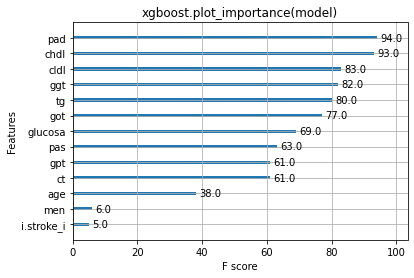

In [13]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

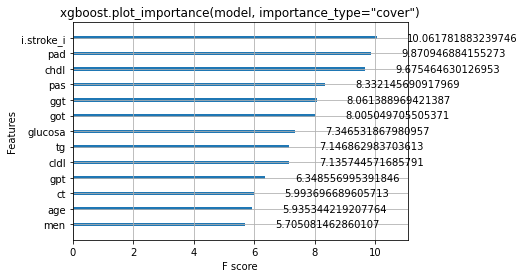

In [14]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

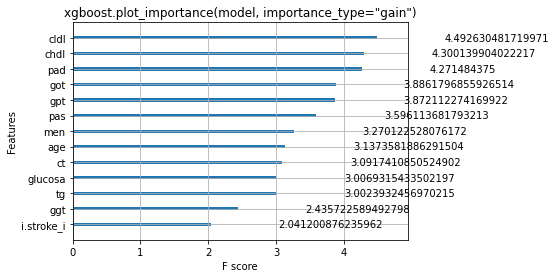

In [15]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [17]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [18]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

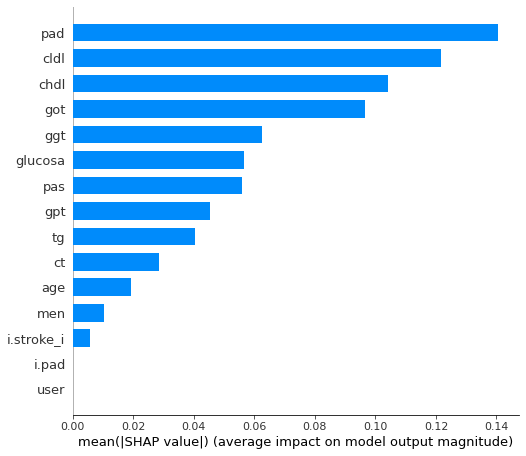

In [19]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

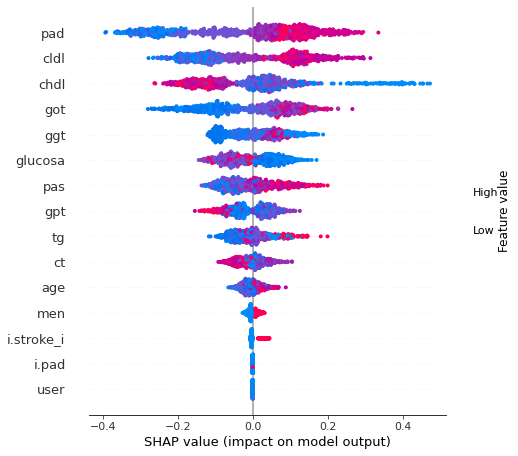

In [20]:
shap.summary_plot(shap_values, X)

In [23]:
# Simple supervised clustering

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [24]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)



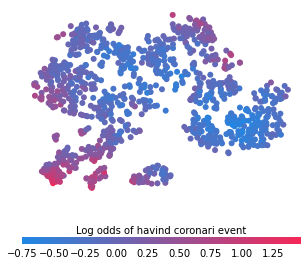

In [25]:
f = pl.figure(figsize=(5,5))
pl.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="Log odds of havind coronari event", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

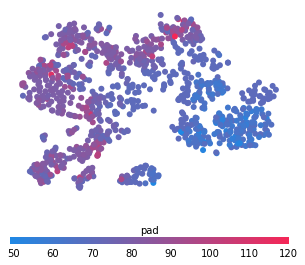

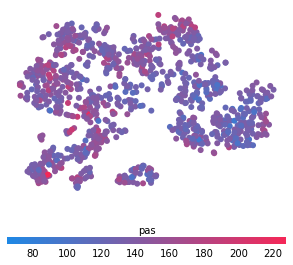

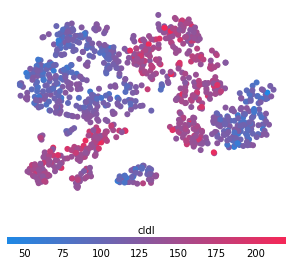

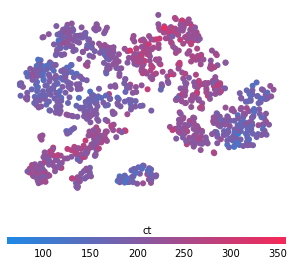

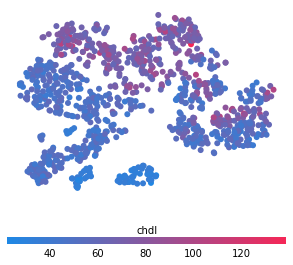

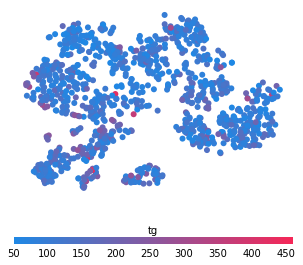

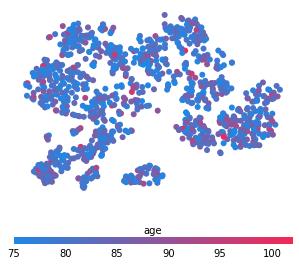

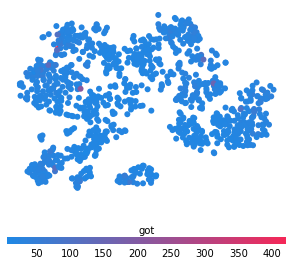

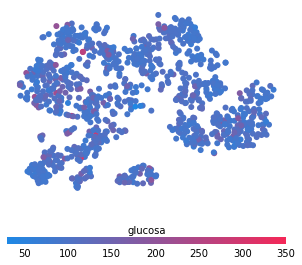

In [27]:
for feature in ['pad', 'pas', 'cldl', 'ct', 'chdl', 'tg', 'age', 'got', 'glucosa']:
    f = pl.figure(figsize=(5,5))
    pl.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].values[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = pl.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    pl.gca().axis("off")
    pl.show()